In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def sector_area (dth, r):
    return 0.5*dth*r**2



def do_polar_plot(theta, radius, density):
    fig, ax =  plt.subplots(subplot_kw={'projection': 'polar'})
    #img = ax.pcolormesh(theta, radius, density, cmap="RdBu", zorder=0, edgecolors='k', lw=0.001)
    img = ax.pcolormesh(theta, radius, density, cmap="RdBu")
    fig.colorbar(img, ax=ax)

    return fig, ax

In [8]:
data = np.loadtxt("../POPG.dat.low.dat", skiprows=1)
data = data[:,:-1]

In [9]:
pd.DataFrame(data)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.0,5.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5.0,10.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10.0,15.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,15.0,20.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,20.0,25.0,24.0,4.0,1.0,1.0,5.0,2.0,2.0,0.0,0.0,5.0,1.0,2.0,5.0,2.0,0.0,2.0
5,25.0,30.0,24.0,12.0,2.0,2.0,5.0,5.0,9.0,9.0,1.0,14.0,4.0,7.0,11.0,5.0,0.0,5.0
6,30.0,35.0,24.0,17.0,3.0,10.0,2.0,16.0,22.0,16.0,2.0,14.0,10.0,7.0,14.0,10.0,6.0,7.0
7,35.0,40.0,24.0,17.0,4.0,11.0,14.0,29.0,21.0,27.0,6.0,4.0,12.0,12.0,19.0,23.0,15.0,11.0
8,40.0,45.0,24.0,21.0,10.0,24.0,21.0,36.0,18.0,15.0,11.0,11.0,11.0,15.0,11.0,17.0,9.0,12.0
9,45.0,50.0,24.0,17.0,14.0,13.0,6.0,20.0,11.0,16.0,16.0,19.0,14.0,24.0,11.0,17.0,14.0,14.0


In [10]:
Ntheta = len(data[0,:])-3
dr = data[1,0]-data[0,0]
dth = 360/Ntheta
rad=np.mean(data[:,0:2], axis=1)
the = np.linspace(0,2*np.pi, Ntheta)
theta, radius = np.meshgrid(the, rad)
density = data[:, 3:]
dth

24.0

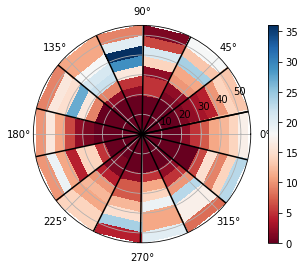

In [30]:
fig, ax = do_polar_plot(theta, radius, density)

theta_centers = [np.deg2rad(180/Ntheta+np.linspace(0, 360, Ntheta))]
ax.vlines(theta_centers, [0], [data[-1,1]], color='k')
plt.show()